# **Week 2 Hands-on Lab: Implementing and Exploring a Basic GAN**

**Introduction:** This exercise you understand the adversarial training mechanism of GANs by implementing a simple GAN using TensorFlow. You will learn how the generator and discriminator interact, visualize the outputs at different training stages, and evaluate the results.

**Step 1: Setup Your Environment**

Import the needed libraries.




In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt


**Step 2: Prepare the Dataset**

Use the MNIST dataset of handwritten digits.

In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the data to the range [0, 1]
x_train = x_train / 255.0

# Flatten the images
#x_train = x_train.reshape(x_train.shape[0], -1)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


**Step 3: Build the Generator**

The generator takes random noise as input and outputs a fake image.


In [ ]:
def build_generator():
    model = Sequential([
        Dense(128, activation='relu', input_dim=100),
        Dense(784, activation='sigmoid'),
        Reshape((28, 28))
    ])
    return model

generator = build_generator()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Step 4: Build the Discriminator**

The discriminator evaluates whether an image is real or fake.


In [ ]:
def build_discriminator():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

discriminator = build_discriminator()
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Step 5: Combine the Models for GAN Training**

Combine the generator and discriminator into a GAN.


In [ ]:
def build_gan(generator, discriminator):
    discriminator.trainable = False  # Freeze discriminator during generator training
    model = Sequential([generator, discriminator])
    model.compile(optimizer='adam', loss='binary_crossentropy')
    return model

gan = build_gan(generator, discriminator)


**Step 6: Train the GAN**

Train the generator and discriminator in an adversarial setup.


In [ ]:
def train_gan(generator, discriminator, gan, data, epochs=1000, batch_size=32):
    half_batch = batch_size // 2

    for epoch in range(epochs):
        # Train discriminator
        idx = np.random.randint(0, data.shape[0], half_batch)
        real_images = data[idx]
        fake_images = generator.predict(np.random.normal(0, 1, (half_batch, 100)))

        real_labels = np.ones((half_batch, 1))
        fake_labels = np.zeros((half_batch, 1))

        d_loss_real = discriminator.train_on_batch(real_images, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        print(d_loss)

        # Train generator
        noise = np.random.normal(0, 1, (batch_size, 100))
        valid_labels = np.ones((batch_size, 1))  # Fool discriminator
        g_loss = gan.train_on_batch(noise, valid_labels)

        # Print losses every 100 epochs
        if epoch % 100 == 0:
            print(f"{epoch} [D loss: {d_loss[0]}] [G loss: {g_loss}]")


**Step 7: Visualize Generated Images**

Generate and visualize images from the trained generator.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 683ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


[0.74502367 0.390625  ]
0 [D loss: 0.7450236678123474] [G loss: 0.9288856983184814]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[0.67819506 0.5677084 ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[0.7011765 0.4864583]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[0.7308488  0.39341518]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[0.77814186 0.3298611 ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
[0.82292724 0.30492425]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
[0.87638164 0.27815932]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
[0.9275744 0.2623698]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
[0.9845443 0.2537786]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[1.0336208  0.25337172]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
[1.0829275  0.23850107]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
[1.1329532  0.23414856]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
[1.1823174  0.22802885]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[1.232366   0.21825397]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[1.2833383 0.2161638]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[1.3337302  0.208

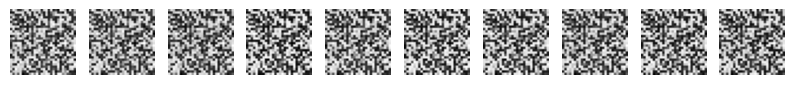

In [ ]:

def generate_and_plot_images(generator, examples=10):
    noise = np.random.normal(0, 1, (examples, 100))
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(examples, 28, 28)

    plt.figure(figsize=(10, 2))
    for i in range(examples):
        plt.subplot(1, examples, i + 1)
        plt.imshow(generated_images[i], cmap='gray')
        plt.axis('off')
    plt.show()

# Generate and plot images after training
train_gan(generator, discriminator, gan, x_train, epochs=1000)
generate_and_plot_images(generator)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


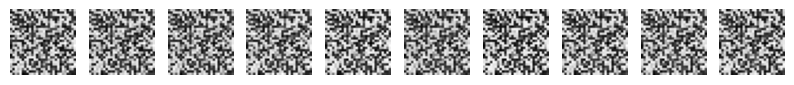

In [ ]:
generate_and_plot_images(generator)